## Importing the necessary libraries

In [1]:
import numpy as np   #numerical python for mathametical opperatioins 
import pandas as pd  #data manupulation usind pandas
import matplotlib.pyplot as plt  #visualization using plots 
import seaborn as sns            #visualization using plots 
from warnings import filterwarnings  
filterwarnings("ignore")         #to ignore warnings
#statistical test
from sklearn.model_selection import train_test_split #to split data into train and test data 
from sklearn.linear_model import LinearRegression    #for predection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score #Evaluation matrix
from sklearn.preprocessing import StandardScaler        #used to scale the features
from sklearn.model_selection import RandomizedSearchCV  #to find the best hyperparameters
from sklearn.ensemble import ExtraTreesRegressor     #for feature selection

## Loading the dataset

In [2]:
train_data=pd.read_excel(r"C:\Users\FELICITA\Documents\Imarticus\python\downloads\data\flight price\Data_Train Flight.xlsx")

In [3]:
#check top 5 records
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


1.training dataset              -----in this dataset both independent and dependent features will be available
2.testing dataset               -----
3.sample submission dataset     -----which format the file should be submited 

In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


we can see there is a missing values in route and total stops(we can treet the missing values later on)

now we will load the testing dataset

In [6]:
test_data=pd.read_excel(r"C:\Users\FELICITA\Documents\Imarticus\python\downloads\data\flight price\Test_set flight.xlsx")

In [7]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
test_data.shape

(2671, 10)

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Exploratory data analysis

Trainind dataset

In [10]:
#checking for null values
null_features=train_data.isnull().sum()
null_features[null_features>0]

Route          1
Total_Stops    1
dtype: int64

In [11]:
train_data[(train_data["Route"].isnull())|(train_data["Total_Stops"].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


now in the 9030 row there is a null value for both route and total_stops1
(1.drop those records
or
you can treat the missing values)

In [12]:
#checking for duplicates
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [13]:
#remove the duplicates values by keeping first record
train_data.drop_duplicates(keep="first",inplace=True)


In [14]:
train_data.shape

(10463, 11)

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Featuring engineering

1.date of journey

In [16]:
#wewill check for date_of_journey
train_data.Date_of_Journey.dtype

dtype('O')

In [17]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [18]:
#will check 1 record to know how the data looks like
train_data.Date_of_Journey[0]

'24/03/2019'

In [19]:
#we will extract only date from Date_of_Journey
train_data["Date"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [20]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [21]:
#extract only month from Date_of_journey
train_data["Month"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [22]:
#extract only Year from Date_of_journey
train_data["Year"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.year

In [23]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [24]:
train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


## departure Time

similar to date of journey we can extract values of hours as well as minutes for departure time column

In [26]:
train_data.Dep_Time.dtype

dtype('O')

In [27]:
train_data.Dep_Time[0]

'22:20'

In [28]:
#now we will extrate hours from the departure time
train_data["Dep_hour"]=pd.to_datetime(train_data.Dep_Time).dt.hour

In [29]:
#now we will extrate minutes from the departure time
train_data["Dep_minutes"]=pd.to_datetime(train_data.Dep_Time).dt.minute

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [31]:
train_data.drop("Dep_Time",axis=1,inplace=True)

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


arival time

In [33]:
#similar to dept time we can ectract the hours and minutes in arival time
train_data["Arrival_hour"]=pd.to_datetime(train_data.Arrival_Time).dt.hour

In [34]:
#similar to dept time we can ectract the hours and minutes in arival time
train_data["Arrival_minutes"]=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [35]:
train_data.drop("Arrival_Time",axis=1,inplace=True)

In [36]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


## Duration

In [37]:
train_data.Duration[0].split()[0]

'2h'

In [38]:
duration=list(train_data.Duration)

In [39]:
duration[0]

'2h 50m'

In [40]:
len(duration)

10463

In [41]:
duration[0].split("m")[0].split()[-1]

'50'

In [42]:
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        elif "m" in duration[i]:
            duration[i]="0h "+duration[i]
            
duration_hour=[]
duration_min=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split("h")[0]))
    duration_min.append(int(duration[i].split("m")[0].split()[-1]))
 

In [43]:
train_data["duration_hour"]=duration_hour
train_data["duration_min"]=duration_min

In [44]:
train_data.drop("Duration",axis=1,inplace=True)

In [45]:
train_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Date                int64
Month               int64
Year                int64
Dep_hour            int64
Dep_minutes         int64
Arrival_hour        int64
Arrival_minutes     int64
duration_hour       int64
duration_min        int64
dtype: object

In [46]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


## Route

In [47]:
#most busiest route
train_data.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [48]:
train_data.drop("Route",axis=1,inplace=True)

Delhi to cochin via mumbai as busiest route with 2376 which is fallowed by Bangalore to Delhi

so let me drop routes information because it will lead to multicolinearity (where 2 independent features are related to eachother ) 

now we will do some analysis for those catagorical features

In [49]:
df_catagorical_features=train_data.dtypes[train_data.dtypes=="object"].index
df_catagorical_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

In [50]:
train_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40


Airline


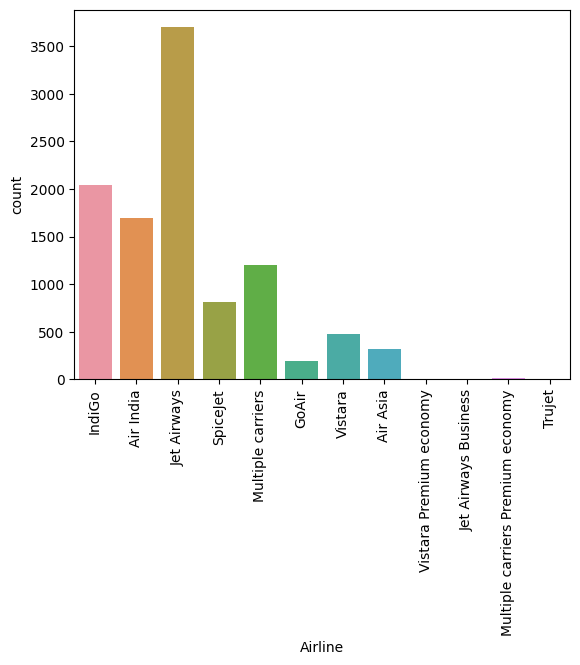

Source


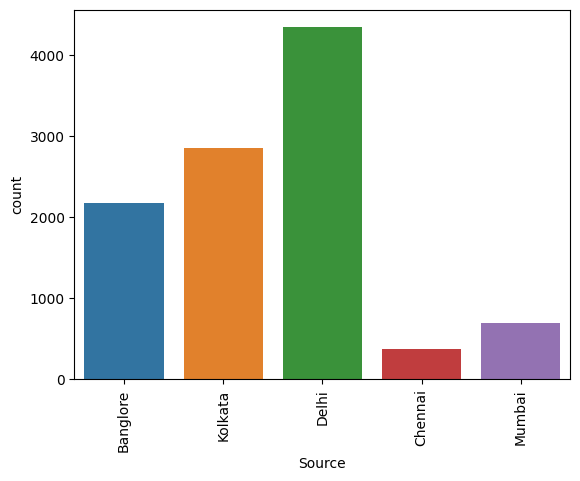

Destination


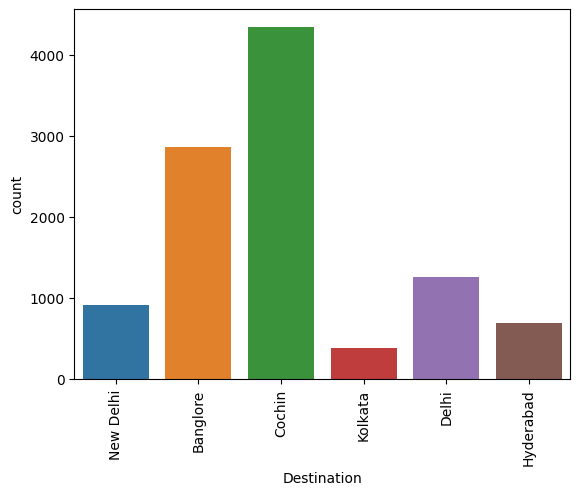

Total_Stops


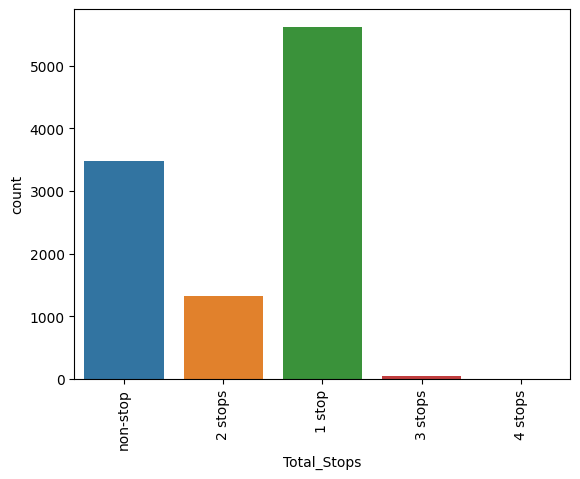

Additional_Info


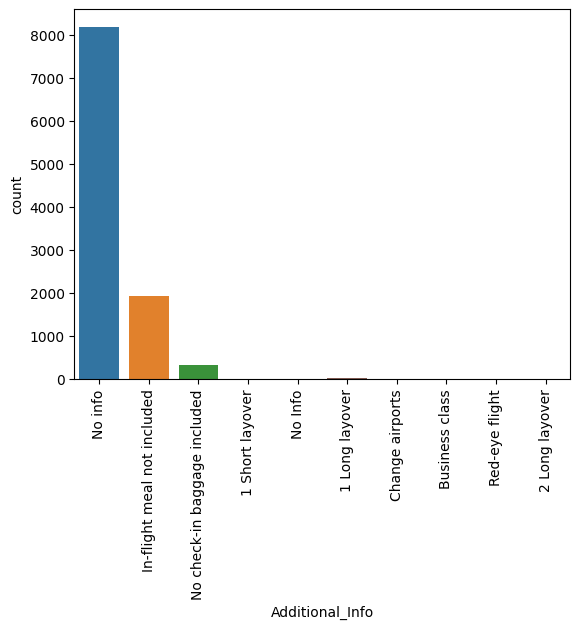

In [51]:
for i in df_catagorical_features:
    print(i)
    sns.countplot(x=train_data[i])
    plt.xticks(rotation=90)
    plt.show()

1. Jet Airways is the highest used Airline to travel
2. Most of the peoplr start traveling from Delhi
3. Most of the people travel to Cochin
4. there are more number of one stop travels compared to others
5. there is no much information provided by additional information since no info has high percentage(so we can drop this column)

In [52]:
train_data.drop("Additional_Info",axis=1,inplace=True)

In [53]:
df_catagorical_features=train_data.dtypes[train_data.dtypes=="object"].index
df_catagorical_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops'], dtype='object')

Airline


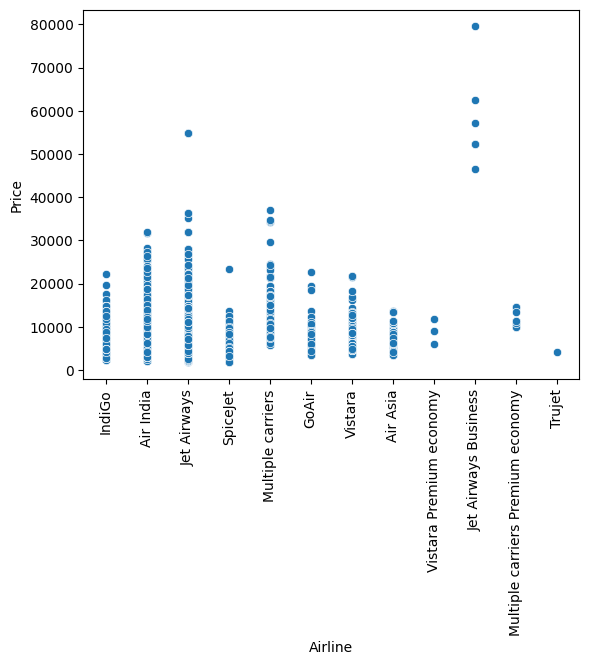

Source


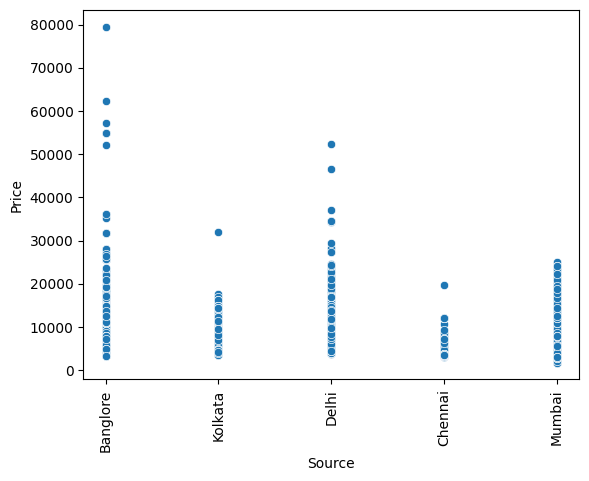

Destination


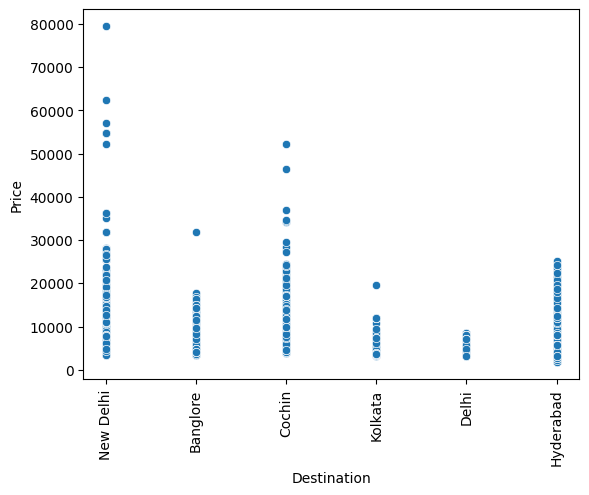

Total_Stops


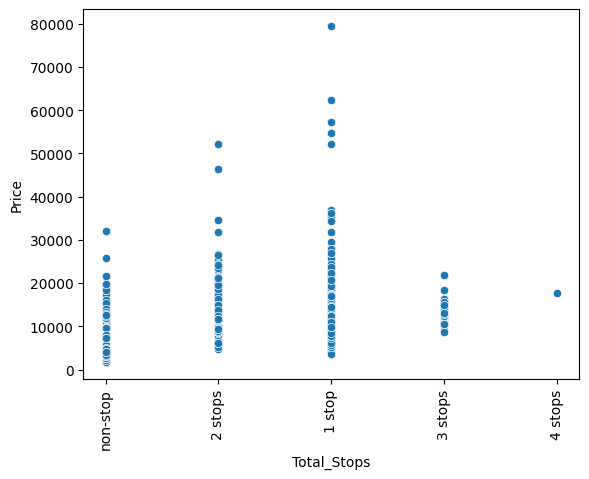

In [54]:
for i in df_catagorical_features:
    print(i)
    sns.scatterplot(x=i,y="Price",data=train_data)
    plt.xticks(rotation=90)
    plt.show() 

1. Jet Airways Business has the highest pricing
2. Bangalore has the highest price as in sorce station
3. New Delhi has the highest price as in destination station
4. One stop has the highest pricing

In [55]:
train_data

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,2019,11,30,14,10,2,40


In [56]:
train_data.dropna(inplace=True)

In [57]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [58]:
train_data.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

### Spliting into x y terms

In [59]:
X=train_data.drop("Price",axis=1)
X.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,1,3,2019,16,50,21,35,4,45


In [60]:
y=train_data.Price
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [61]:
X=pd.get_dummies(X,drop_first=True)

In [62]:
X.head()

,Total_Stops,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [64]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8369, 30), (2093, 30), (8369,), (2093,))

In [65]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pre=lr.predict(X_train)
y_test_pre=lr.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 2893.706979163004
Test RMSE = 2620.988026376161
Train R2_square = 0.6185110349883294
Test R2_square = 0.64104305577419


In [66]:
DR=DecisionTreeRegressor()
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 796.8163752037271
Test RMSE = 2493.1604234966326
Train R2_square = 0.9710739336696111
Test R2_square = 0.6752024578794108


In [67]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 1018.619459786675
Test RMSE = 1823.669708370103
Train R2_square = 0.9527287796696535
Test R2_square = 0.8262180546917693


### First we want to build the base model and which ever model was giving me best accuracy based on that we want to perfrom Hypertuning technique

### We found that random forest provdes best accuracy compared to linear regression and decission tree. so lets perform hyperparameter for random forest 

In [68]:
n_estimators=[i for i in range(100,500,100)]
max_depth=[i for i in range(5,20,5)]
min_samples_leaf=[i for i in range(5,20,5)]

In [69]:
random_grid_RF={"n_estimators":n_estimators,"max_depth":max_depth,"min_samples_leaf":min_samples_leaf}

In [70]:
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid_RF,cv=4,random_state = 0)

In [71]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [72]:
RF_model.best_params_

{'n_estimators': 400, 'min_samples_leaf': 5, 'max_depth': 10}

In [73]:
RF=RandomForestRegressor(n_estimators=400, min_samples_leaf=5, max_depth=10)
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 1890.7587557719146
Test RMSE = 1861.7359933653972
Train R2_square = 0.8371284921792317
Test R2_square = 0.8188874789778485


Feature selection

In [74]:
selection = ExtraTreesRegressor()
selection.fit(X,y)
print(selection.feature_importances_)

Traceback (most recent call last):
  File "D:\anaconda\lib\inspect.py", line 2968, in __init__
    params = OrderedDict((param.name, param) for param in parameters)
RuntimeError: Object of type <class 'numpy.ndarray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


[2.47812404e-01 1.44019617e-01 5.35469368e-02 0.00000000e+00
 2.42409860e-02 2.16694267e-02 2.81672426e-02 1.90037866e-02
 1.02815117e-01 1.73881766e-02 1.22671869e-02 1.80565866e-03
 1.59856253e-02 1.31642405e-01 6.78487444e-02 2.00403359e-02
 8.94177805e-04 3.31112120e-03 9.70449443e-05 5.28246221e-03
 8.30203291e-05 5.28964631e-04 7.57838269e-03 3.14492103e-03
 6.38419633e-03 1.42187020e-02 1.68921858e-02 7.56357938e-03
 4.03460757e-04 2.53641308e-02]


<Axes: >

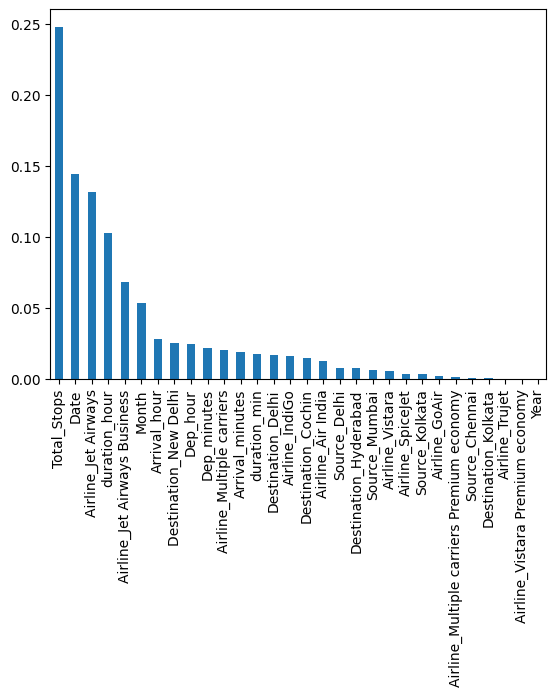

In [75]:
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [76]:
X_imp = X[feat_importances.nlargest(15).index]
X_imp.head()

,Total_Stops,Date,Airline_Jet Airways,duration_hour,Airline_Jet Airways Business,Month,Arrival_hour,Destination_New Delhi,Dep_hour,Dep_minutes,Airline_Multiple carriers,Arrival_minutes,duration_min,Destination_Delhi,Airline_IndiGo
0,0,24,0,2,0,3,1,1,22,20,0,10,50,0,1
1,2,1,0,7,0,5,13,0,5,50,0,15,25,0,0
2,2,9,1,19,0,6,4,0,9,25,0,25,0,0,0
3,1,12,0,5,0,5,23,0,18,5,0,30,25,0,1
4,1,1,0,4,0,3,21,1,16,50,0,35,45,0,1


In [77]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [78]:
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid_RF,cv=4,random_state = 0)
RF_model.fit(X_train,y_train)
RF_model.best_params_

{'n_estimators': 400, 'min_samples_leaf': 5, 'max_depth': 10}

In [79]:
RF=RandomForestRegressor(n_estimators=400, min_samples_leaf=5, max_depth=10)
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 1920.870401006761
Test RMSE = 1928.8987052169032
Train R2_square = 0.831899499882826
Test R2_square = 0.8055843916274656
